In [1]:
import sandy
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import copy

## Draft procedure to perform sampling of half life :

In [2]:
zam = 922350
endf6 = sandy.get_endf6_file("jeff_33", 'decay', zam)

In [3]:
rdd = sandy.DecayData.from_endf6(endf6)

In [4]:
HL = rdd.get_halflives(False).values 
DHL = rdd.get_halflives().DHL.values/HL # To obtain the relative value of the uncertainty (coherent with the 
# relative variances for the cross section stored in ENDF6 file) which we assume equals to standard deviation

In [5]:
cov = sandy.CategoryCov.from_stdev(DHL)

In [6]:
nsamples = 50000

In [7]:
Perturbation_coeff = cov.sampling(nsamples).data

In [8]:
Perturbed_values = Perturbation_coeff * HL # This operation will be performed with a method (<custom_perturmation_HL>)
# through which the HL value stored in rdd.data dict will be updated with the perturbed value. This method will return 
# DecayData object and the new information could be stored in ENDF6 format with the method <to_endf6> 
# (and then <to_file> if needed)

C:\Users\felic\anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

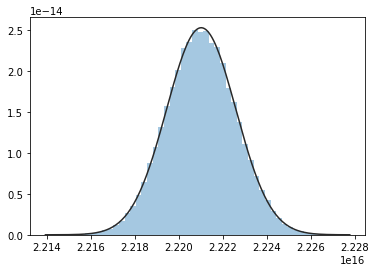

In [9]:
sns.distplot(x=Perturbed_values, fit=norm, kde=False)

In [10]:
df = pd.DataFrame({'Mean sampling distribution': Perturbed_values.mean(), 
                   'Std sampling distribution': Perturbed_values.std(), 'HL': HL, 'DHL': DHL * HL}).T

In [11]:
df.rename(columns={ 0: "Values"}, inplace=True)
df

,Values
Mean sampling distribution,2.22101e+16
Std sampling distribution,1.57447e+13
HL,2.22102e+16
DHL,1.57788e+13


In [12]:
rdd_perturbed = copy.deepcopy(rdd.data)
rdd_perturbed[zam]['half_life'] = Perturbed_values.values[0][0]
rdd_perturbed = sandy.DecayData(rdd_perturbed)
# This cell will be included in the <custom_perturmation_HL> method which will return a DecayData object with the 
# updated perturbed information

In [13]:
new_endf6 = rdd_perturbed.to_endf6(endf6)

In [14]:
new_endf6

MAT   MF  MT 
3542  1   451     9.223500+4 2.330250+2         -1          1  ...
          452     9.223500+4 2.330250+2          0          1  ...
      8   457     92235.0000 233.025000          0          0  ...
dtype: object

In [15]:
new_endf6.to_file('perturbed_HL')

In [16]:
rdd_perturbed.data[zam]['half_life']

2.21965013606862e+16

In [17]:
rdd.data[zam]['half_life']

2.22102e+16

In [19]:
import os
os.system('jupyter nbconvert --to html Sampling_half_life.ipynb')

0